<a href="https://colab.research.google.com/github/Shabehehe/test_images/blob/master/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
!git clone https://github.com/tensorflow/models.git
!apt-get -qq install libprotobuf-java protobuf-compiler
!protoc object_detection/protos/*.proto --python_out=.
!cp -R models/research/object_detection/ object_detection/
!rm -rf models

Cloning into 'models'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 22343 (delta 3), reused 4 (delta 3), pack-reused 22333
Receiving objects: 100% (22343/22343), 559.86 MiB | 32.44 MiB/s, done.
Resolving deltas: 100% (13199/13199), done.
Checking out files: 100% (2829/2829), done.


In [0]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt

from PIL import Image

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [0]:

# What model to download.
# MODEL_NAME = 'ssd_mobilenet_v1_coco_2017_11_17'

# model with more accurancy but up to you use a diferent model
MODEL_NAME = 'faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08'

MODEL_FILE = MODEL_NAME + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = os.path.join('object_detection/data', 'mscoco_label_map.pbtxt')

NUM_CLASSES = 90

opener = urllib.request.URLopener()
opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())
    
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')
    
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [0]:
# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'object_detection/test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)

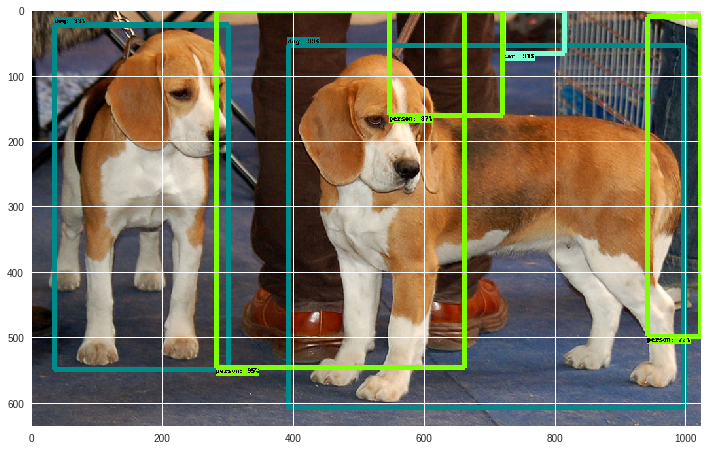

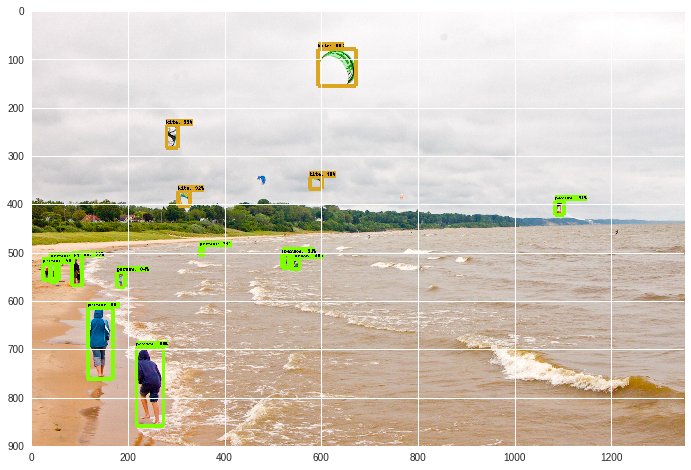

In [56]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    # Definite input and output Tensors for detection_graph
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    # Each box represents a part of the image where a particular object was detected.
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    # Each score represent how level of confidence for each of the objects.
    # Score is shown on the result image, together with the class label.
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(image_path)
      # the array based representation of the image will be used later in order to prepare the
      # result image with boxes and labels on it.
      image_np = load_image_into_numpy_array(image)
      # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
      image_np_expanded = np.expand_dims(image_np, axis=0)
      # Actual detection.
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      # Visualization of the results of a detection.
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)

Custom Personal Image

In [0]:
!mkdir images

In [18]:
!wget https://drive.google.com/open?id=15UMp5pPMm6QayfV5KldJkNayEOTU-ZHP

--2018-10-26 20:04:30--  https://drive.google.com/open?id=15UMp5pPMm6QayfV5KldJkNayEOTU-ZHP
Resolving drive.google.com (drive.google.com)... 64.233.170.101, 64.233.170.102, 64.233.170.139, ...
Connecting to drive.google.com (drive.google.com)|64.233.170.101|:443... connected.
HTTP request sent, awaiting response... 307 OK
Location: https://drive.google.com/file/d/15UMp5pPMm6QayfV5KldJkNayEOTU-ZHP/view?usp=drive_open [following]
--2018-10-26 20:04:30--  https://drive.google.com/file/d/15UMp5pPMm6QayfV5KldJkNayEOTU-ZHP/view?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘open?id=15UMp5pPMm6QayfV5KldJkNayEOTU-ZHP.3’

open?id=15UMp5pPMm6     [ <=>                ] 132.08K  --.-KB/s    in 0.009s  

2018-10-26 20:04:30 (14.0 MB/s) - ‘open?id=15UMp5pPMm6QayfV5KldJkNayEOTU-ZHP.3’ saved [135248]



In [21]:
!wget https://drive.google.com/open?id=1XZUjDns2cd_r-oZ_uXd2VGSWqHsoJdFu

--2018-10-26 20:10:10--  https://drive.google.com/open?id=1XZUjDns2cd_r-oZ_uXd2VGSWqHsoJdFu
Resolving drive.google.com (drive.google.com)... 108.177.12.139, 108.177.12.113, 108.177.12.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.12.139|:443... connected.
HTTP request sent, awaiting response... 307 OK
Location: https://drive.google.com/file/d/1XZUjDns2cd_r-oZ_uXd2VGSWqHsoJdFu/view?usp=drive_open [following]
--2018-10-26 20:10:10--  https://drive.google.com/file/d/1XZUjDns2cd_r-oZ_uXd2VGSWqHsoJdFu/view?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘open?id=1XZUjDns2cd_r-oZ_uXd2VGSWqHsoJdFu’

open?id=1XZUjDns2cd     [ <=>                ] 132.08K  --.-KB/s    in 0.01s   

2018-10-26 20:10:10 (11.1 MB/s) - ‘open?id=1XZUjDns2cd_r-oZ_uXd2VGSWqHsoJdFu’ saved [135248]



In [32]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-reposito4/AADW4Ck6mZqDSQaOrK4MJGNa1r7PdTqANx_Fa7njMogx3bNubP5BD4cry -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
/bin/bash: add-apt-reposito4/AADW4Ck6mZqDSQaOrK4MJGNa1r7PdTqANx_Fa7njMogx3bNubP5BD4cry: No such file or directory
E: Unable to locate package google-drive-ocamlfuse


KeyboardInterrupt: ignored

In [33]:
%cd /content/
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls -ll /content/

/content
/bin/bash: google-drive-ocamlfuse: command not found
total 657172
-rw-r--r--  1 root root      2506 Oct 26 20:05  adc.json
drwxr-xr-x  2 root root      4096 Oct 26 20:10  drive
drwxr-xr-x  2 root root      4096 Oct 26 19:40  faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08
-rw-r--r--  1 root root 672197456 Oct 26 19:46  faster_rcnn_inception_resnet_v2_atrous_coco_2017_11_08.tar.gz
drwxr-xr-x  2 root root      4096 Oct 26 19:54  images
drwxr-xr-x 26 root root      4096 Oct 26 19:36  object_detection
-rw-r--r--  1 root root    135248 Oct 26 20:03 'open?id=15UMp5pPMm6QayfV5KldJkNayEOTU-ZHP'
-rw-r--r--  1 root root    135248 Oct 26 20:03 'open?id=15UMp5pPMm6QayfV5KldJkNayEOTU-ZHP.1'
-rw-r--r--  1 root root    135246 Oct 26 20:04 'open?id=15UMp5pPMm6QayfV5KldJkNayEOTU-ZHP.2'
-rw-r--r--  1 root root    135248 Oct 26 20:04 'open?id=15UMp5pPMm6QayfV5KldJkNayEOTU-ZHP.3'
-rw-r--r--  1 root root    135248 Oct 26 20:10 'open?id=1XZUjDns2cd_r-oZ_uXd2VGSWqHsoJdFu'
drwxr-xr-x  2 root r

In [34]:
!pwd
%cd images
!rm -rf *.jpg

!cp /content/drive/temp/images/*.jpg ./

/content
/content/images
cp: cannot stat '/content/drive/temp/images/*.jpg': No such file or directory


In [35]:
PATH_TO_TEST_IMAGES_DIR = 'images/'
#TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'custom_img_{}.jpg'.format(i)) for i in range(1, 3) ]
TEST_IMAGE_PATHS = next(os.walk('images/'))[2]
print(TEST_IMAGE_PATHS)
IMAGE_SIZE = (12, 8)

StopIteration: ignored

In [36]:
with detection_graph.as_default():
  with tf.Session(graph=detection_graph) as sess:
    image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
    detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
    detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
    detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
    num_detections = detection_graph.get_tensor_by_name('num_detections:0')
    for image_path in TEST_IMAGE_PATHS:
      image = Image.open(PATH_TO_TEST_IMAGES_DIR + image_path)
      image_np = load_image_into_numpy_array(image)
      image_np_expanded = np.expand_dims(image_np, axis=0)
      (boxes, scores, classes, num) = sess.run(
          [detection_boxes, detection_scores, detection_classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
      print(boxes)
      vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=2)
      plt.figure(figsize=IMAGE_SIZE)
      plt.imshow(image_np)

FileNotFoundError: ignored

In [0]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)


def download_and_resize_image(url, new_width=256, new_height=256,
                              display=False):
  _, filename = tempfile.mkstemp(suffix=".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG", quality=90)
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename


def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  """Adds a bounding box to an image."""
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)

  # If the total height of the display strings added to the top of the bounding
  # box exceeds the top of the image, stack the strings below the bounding box
  # instead of above.
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  # Each display_str has a top and bottom margin of 0.05x.
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = bottom + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=20, min_score=0.5):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
                              25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i].tolist())
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

In [39]:
with tf.Graph().as_default():
  detector = hub.Module(
      "https://drive.google.com/open?id=15UMp5pPMm6QayfV5KldJkNayEOTU-ZHP"
  )
  image_string_placeholder = tf.placeholder(tf.string)
  decoded_image = tf.image.decode_jpeg(image_string_placeholder)
  # Module accepts as input tensors of shape [1, height, width, 3], i.e. batch
  # of size 1 and type tf.float32.
  decoded_image_float = tf.image.convert_image_dtype(
      image=decoded_image, dtype=tf.float32)
  module_input = tf.expand_dims(decoded_image_float, 0)
  result = detector(module_input, as_dict=True)
  init_ops = [tf.global_variables_initializer(), tf.tables_initializer()]

  session = tf.Session()
  session.run(init_ops)

  # Load the downloaded and resized image and feed into the graph.
  with tf.gfile.Open(downloaded_image_path, "rb") as binfile:
    image_string = binfile.read()

  result_out, image_out = session.run(
      [result, decoded_image],
      feed_dict={image_string_placeholder: image_string})
  print("Found %d objects." % len(result_out["detection_scores"]))

image_with_boxes = draw_boxes(
    np.array(image_out), result_out["detection_boxes"],
    result_out["detection_class_entities"], result_out["detection_scores"])

display_image(image_with_boxes)

NameError: ignored

In [40]:
image_urls = ["https://farm7.staticflickr.com/8092/8592917784_4759d3088b_o.jpg",
              "https://farm6.staticflickr.com/2598/4138342721_06f6e177f3_o.jpg",
              "https://c4.staticflickr.com/9/8322/8053836633_6dc507f090_o.jpg"]

for image_url in image_urls:
  image_path = download_and_resize_image(image_url, 640, 480)
  with tf.gfile.Open(image_path, "rb") as binfile:
    image_string = binfile.read()

  inference_start_time = time.clock()
  result_out, image_out = session.run(
      [result, decoded_image],
      feed_dict={image_string_placeholder: image_string})
  print("Found %d objects." % len(result_out["detection_scores"]))
  print("Inference took %.2f seconds." % (time.clock()-inference_start_time))

  image_with_boxes = draw_boxes(
    np.array(image_out), result_out["detection_boxes"],
    result_out["detection_class_entities"], result_out["detection_scores"])

  display_image(image_with_boxes)


NameError: ignored